In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

11490434/11490434 [==============================] - 0s 0us/step


# Define the Single-Layer Perceptron model

In [3]:
model = models.Sequential([
    layers.Dense(10, activation='softmax', input_shape=(28*28,))
])

# Compile the model

In [4]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [6]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3499 - accuracy: 0.9032 - val_loss: 0.3306 - val_accuracy: 0.9106
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3448 - accuracy: 0.9047 - val_loss: 0.3266 - val_accuracy: 0.9112
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3404 - accuracy: 0.9055 - val_loss: 0.3229 - val_accuracy: 0.9121
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3364 - accuracy: 0.9064 - val_loss: 0.3199 - val_accuracy: 0.9123
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3329 - accuracy: 0.9072 - val_loss: 0.3166 - val_accuracy: 0.9131
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3297 - accuracy: 0.9080 - val_loss: 0.3145 - val_accuracy: 0.9134
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3268 - accuracy: 0.9091 - val_loss: 0.3119 - val_accuracy: 0.9141
Epoch 

# Visualization of training loss and accuracy

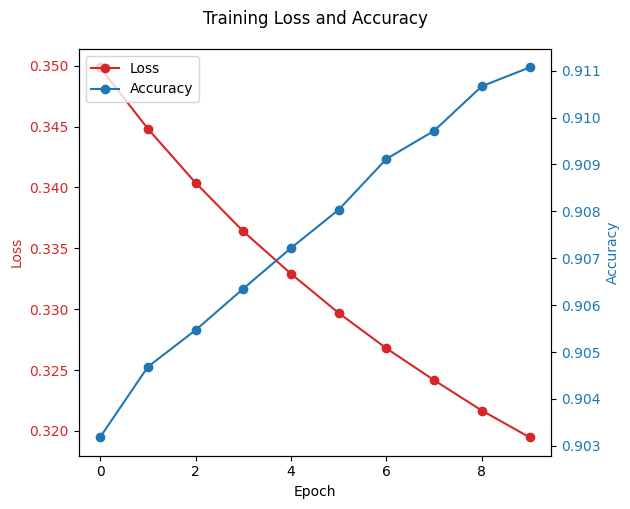

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(history.epoch, history.history['loss'], marker='o', color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(history.epoch, history.history['accuracy'], marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('Training Loss and Accuracy', y=1.05)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# Evaluation

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - loss: 0.3057 - accuracy: 0.9152 - 430ms/epoch - 1ms/step
Test Accuracy: 0.9152


# Visualization of some test images and their predictions

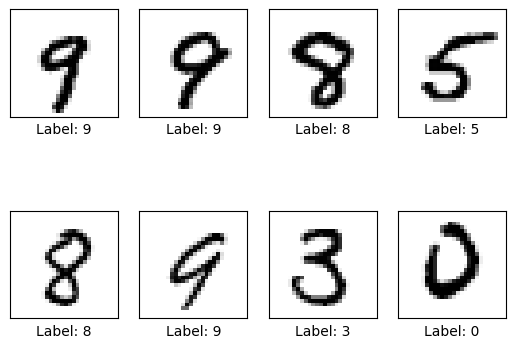

1/1 [==============================] - 0s 21ms/step


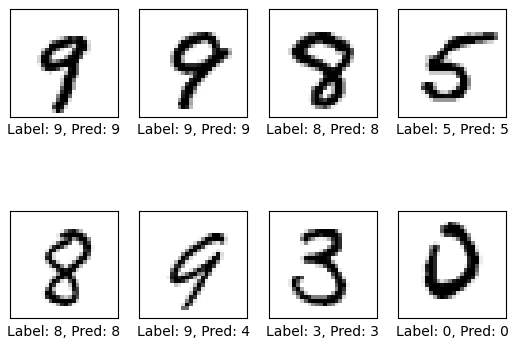

In [12]:
def plot_images(images, labels, predictions=None):
    plt.figure()
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        if predictions is None:
            plt.xlabel(f"Label: {labels[i]}")
        else:
            plt.xlabel(f"Label: {labels[i]}, Pred: {predictions[i]}")
    plt.show()

# Get some random test images
indices = np.random.choice(len(test_images), 8)
sample_images = test_images[indices]
sample_labels = test_labels[indices]

# Show images with ground truth labels
plot_images(sample_images, sample_labels)

# Predict labels for the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Show images with predicted labels
plot_images(sample_images, sample_labels, predicted_labels)
